# Predecir la eficiencia del combustible


En esta actividad utilizaremos clásico conjunto de datos [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg). Vamos a diseñar un modelo con **Keras** para predecir la eficiencia del combustible de los automóviles de finales de los 70 y principios de los 80. El conjunto de datos contiene información de muchos automóviles de ese periodo de tiempo, como cilindros, desplazamiento, caballos de fuerza y peso.

# Ivan Corredor

In [1]:
pip install tensorflow==2.13.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importar bibliotecas básicas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns # biblioteca de visualización de datos basada en matplotlib

In [3]:
# Importar bibliotecas de tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# El conjunto de datos Auto MPG
El conjunto de datos está disponible en el [repositorio de aprendizaje automático de la UCI](https://archive.ics.uci.edu/ml/) (University of California, Irvine).

Obtener los datos:
Descargar e importar el conjunto de datos utilizando pandas.

In [4]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [5]:
dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [6]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


1. **MPG (Miles per gallon)**: Esta es la variable objetivo que se quiere predecir. Representa la eficiencia de combustible del vehículo en **millas por galón**.

2. **cylinders (Cilindros)**: Número de cilindros en el motor del automóvil. Esta variable es de tipo entero y puede tomar valores como 3, 4, 5, 6 u 8 cilindros.

3. **Displacement (Desplazamiento)**: Desplazamiento del motor en **pulgadas cúbicas**. Esta es una variable numérica continua que mide el volumen total de todos los cilindros del motor (conocida en Colombia como cilindraje).

4. **Horsepower (Caballos de fuerza)**: Potencia del motor medida en **caballos de fuerza**. Esta variable es numérica continua.

5. **Weight (Peso)**: Peso del vehículo en **libras**. Esta es una variable numérica continua.

6. **Acceleration (Aceleración)**: Tiempo que toma el vehículo en acelerar de 0 a 60 millas por hora, medido en **segundos**. Esta es una variable numérica continua.

7. **Model year (Año del modelo)**: Año en el que el modelo del automóvil fue fabricado. Esta variable es de **tipo entero** y generalmente está codificada como el último dígito del año (por ejemplo, '70' para 1970).

8. **Origin (Origen)**: Región de origen del vehículo. Esta variable es categórica y toma tres valores:
   - 1: América (USA)
   - 2: Europa
   - 3: Asia

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [8]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


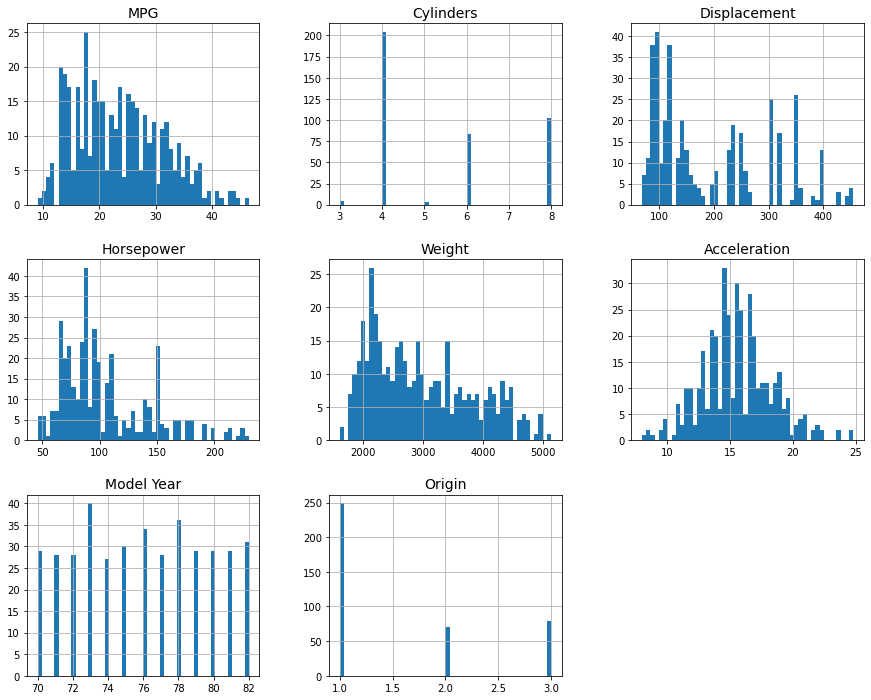

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

dataset.hist(bins=50, figsize=(15, 12))
plt.show()

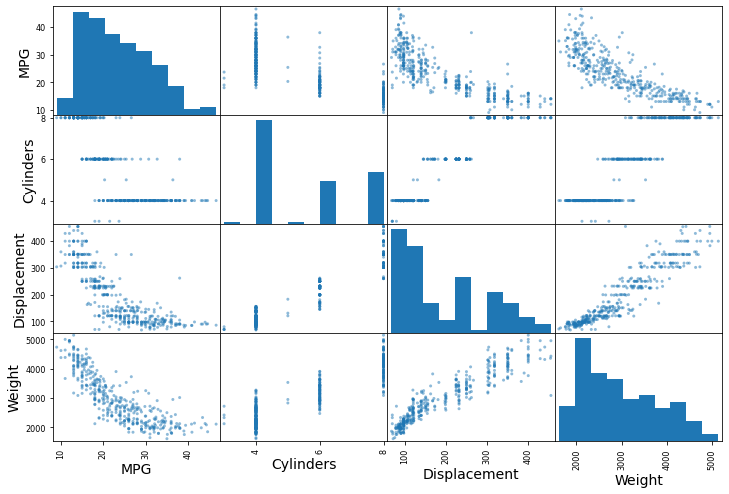

In [10]:
from pandas.plotting import scatter_matrix

attributes = ['MPG', 'Cylinders', 'Displacement', 'Weight']
scatter_matrix(dataset[attributes], figsize=(12, 8))
plt.show()

### Verificar datos faltantes y datos categóricos

In [11]:
# El dataset contiene algunos valores faltantes.
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [12]:
# Completar datos faltantes
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
dataset['Horsepower'] = imputer.fit_transform(dataset[['Horsepower']])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [13]:
# Verificamos que el dataset ya NO contiene valores faltantes.
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [14]:
# La columna de "Origin" realmente es categórica. Entonces la convertimos a "one-hot":

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
origin_encoded = encoder.fit_transform(dataset[['Origin']])
dataset[['USA','Europe','Japan']] = origin_encoded
dataset.drop('Origin',axis=1,inplace=True)
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


### Dividir en entrenamiento y prueba

Usaremos el set de pruebas en la evaluación final de nuestro modelo.

In [15]:
# Primero dividamos las características de las etiquetas
X = dataset.drop('MPG',axis=1)
y = dataset['MPG']

In [16]:
X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


In [17]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: MPG, dtype: float64

# Construcción del modelo
Ya tenemos todo listo para construir el modelo de regresión con Keras.


Recuerde estandarizar los datos antes de entrenar.

Grafique la pérdida en los datos de entrenamiento y validación.

Calcule las métricas de desempeño usadas típicamente en problemas de regresión.

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# 80% de los datos entrenamiento y 20% para prueba al final
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y,test_size=0.2, random_state=42)

# se vuelve a dividir el conjunto de entrenamiento (80%) en 80% entrenamiento y 20% validación
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [81]:
# correr la red neuronal
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape= X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(100, activation="linear"), #relu
    tf.keras.layers.Dense(100, activation="linear"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [82]:
model.summary()
### primera capa 9 parametros, 9 varianzas 9 mediasy y 1 sesgo
### segunda capa p parametros x 100 neuronas=900 + 100 sesgos por cada neurona
### así sucesivamente

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 9)                 19        
 tion)                                                           
                                                                 
 dense_15 (Dense)            (None, 100)               1000      
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dense_18 (Dense)            (None, 1)                 101       
                                                                 
Total params: 21320 (83.29 KB)
Trainable params: 21301 (83.21 KB)
Non-trainable params: 19 (80.00 Byte)
________________

In [83]:
# instalar paquete para hacer gráficas
#pip install pydot

In [84]:
#import pydot as pydot
#tf.keras.utils.plot_model(model, "California_Regression_Model.png", show_shapes=True)

In [85]:
model.compile(loss="mse", optimizer='Adam', metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)  # normalizan los datos antes de entrenar

In [86]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid)) #validation_split=0,2 en vez de validation_data

Epoch 1/20
8/8 [==============================] - 1s 30ms/step - loss: 587.7255 - root_mean_squared_error: 24.2431 - val_loss: 621.1467 - val_root_mean_squared_error: 24.9228
Epoch 2/20
8/8 [==============================] - 0s 7ms/step - loss: 520.4279 - root_mean_squared_error: 22.8129 - val_loss: 540.6671 - val_root_mean_squared_error: 23.2522
Epoch 3/20
8/8 [==============================] - 0s 7ms/step - loss: 437.1076 - root_mean_squared_error: 20.9071 - val_loss: 431.0251 - val_root_mean_squared_error: 20.7611
Epoch 4/20
8/8 [==============================] - 0s 7ms/step - loss: 319.3830 - root_mean_squared_error: 17.8713 - val_loss: 270.1330 - val_root_mean_squared_error: 16.4357
Epoch 5/20
8/8 [==============================] - 0s 7ms/step - loss: 175.5548 - root_mean_squared_error: 13.2497 - val_loss: 130.8487 - val_root_mean_squared_error: 11.4389
Epoch 6/20
8/8 [==============================] - 0s 7ms/step - loss: 104.3873 - root_mean_squared_error: 10.2170 - val_loss: 108

In [87]:
# el rmse y la perdida en el conjunto de validación siempre es mayor al de entrenamiento,
# debido a que le modelo está trabajando en el conjunto de entrenamiento

In [88]:
#metricas de desempeño
mse_test, rmse_test = model.evaluate(X_test, y_test)

print(f"MSE: {mse_test}, RMSE: {rmse_test}")

3/3 [==============================] - 0s 3ms/step - loss: 6.3399 - root_mean_squared_error: 2.5179
MSE: 6.339936256408691, RMSE: 2.51792311668396


### observar metricas de desempeño

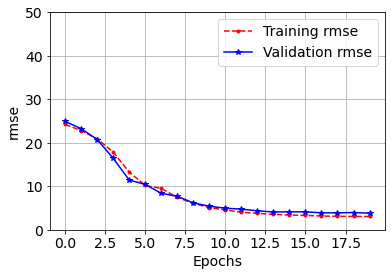

In [89]:
rmse = history.history["root_mean_squared_error"]
val_rmse = history.history["val_root_mean_squared_error"]

plt.plot(history.epoch, rmse, "r--.", label="Training rmse")
plt.plot(history.epoch, val_rmse, "b-*", label="Validation rmse")

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("rmse",fontsize=14)
plt.ylim(0,50)
plt.grid(True)

## predicciones

3/3 [==============================] - 0s 2ms/step


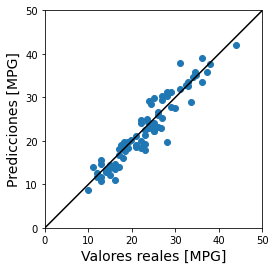

In [90]:
# Hacer predicciones y gráficar
y_pred = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales [MPG]')
plt.ylabel('Predicciones [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims,'k')

In [91]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(f"Predictions:\n {y_pred}\n")
print(f"Labels: {list(y_test[:3])}")

1/1 [==============================] - 0s 21ms/step
Predictions:
 [[33.54618 ]
 [31.225534]
 [19.667402]]

Labels: [33.0, 28.0, 19.0]


<ipython-input-91-63dd33ca4d1a>:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(f"Labels: {list(y_test[:3])}")
